# Supervised learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import  stats

### Part 1: Descriptive statistics and preprocessing

1) Charger les jeux de données _*train.csv*_ et _*test.csv*_, afficher leurs dimensions, afficher les premières lignes, et fournir un résumé statistique à l’aide de [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) pour chaque jeu de données.


In [3]:
# Answer
house_data = pd.read_csv('../dataset/House_pricing.csv')
house_data.shape

(1000, 38)

In [4]:
house_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
house_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
#  MSSubClass :variable quantitative ordinale(The building class)
#  LotFrontage:variable quantitative continue(longueur totale de la bordure d'une propriété par pieds)
# LotArea :variable quantitative continue (Surface du terrain mesure en pas)
#  OverallQual : variable quantitative ordinale(mesure la qualité des materiels)
#  OverallCond :variable quantitative ordinale(mesure la qualité du maison)
# YearBuilt :variable quantitative discret (année de construction)
# YearRemodAdd :variable quantitative discret (année de dernier reparation)
#  BsmtFinSF1 :       variable quantitative    (surface habitable)
# TotalBsmtSF :BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
#  1stFlrSF :surface du 1er etage en pas
#  Fireplaces :nombre des cheminés
#  GarageYrBlt :année de construction de garage
#  GarageCars : Size of garage in car capacity
#  WoodDeckSF :superficie de la terrace

In [7]:
house_data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

2) Extraire la variable cible ```SalePrice``` des jeux de données ```train``` et ```test```, et les stocker respectivement sous les noms ```train_target``` et ```test_target```. Supprimer les variables inutiles de ces mêmes jeux de données.

In [8]:
# Answer
y_target = house_data['SalePrice']
house_data.drop(['Id','SalePrice'],axis=1,inplace=True)


3) Définir une fonction qui identifie les variables contenant des valeurs manquantes, et qui retourne pour chacune : le nom de la variable, le nombre de valeurs manquantes, ainsi que le pourcentage de valeurs manquantes.

In [9]:
# Answer
def isnaVariable(data):
    for col in data.columns:
        NAN = col.isna().sum()
        if NAN <0:
            print(f"Le variable {col} admet {NAN} valeurs manquantes ça fait {NAN/data.shape[0]} %")

4) Pour simplifier, remplir les valeurs manquantes avec 0 en utilisant [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) (modifier directement le jeu de données concerné).

In [10]:
# Answer
house_data.fillna(value=0,inplace=True)

5) Décrire la variable cible ```train_target```

In [11]:
# Answer
stat,p_value = stats.skewtest(y_target)
kurt = stats.kurtosis(y_target)
print(f'le taux d applatissement de y_target est {kurt} > 0 donc applatissement leptokurtique')
print(f'p_value : {p_value} >0 donc distribution décalée à guache de la médiane')
print(y_target.describe())

le taux d applatissement de y_target est 5.2785609294473765 > 0 donc applatissement leptokurtique
p_value : 2.0485370940177108e-57 >0 donc distribution décalée à guache de la médiane
count      1000.000000
mean     182284.451000
std       80291.215207
min       34900.000000
25%      130000.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


6) Tracer l’histogramme et la densité de ```train_target``` (vous pouvez utiliser le module [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html))

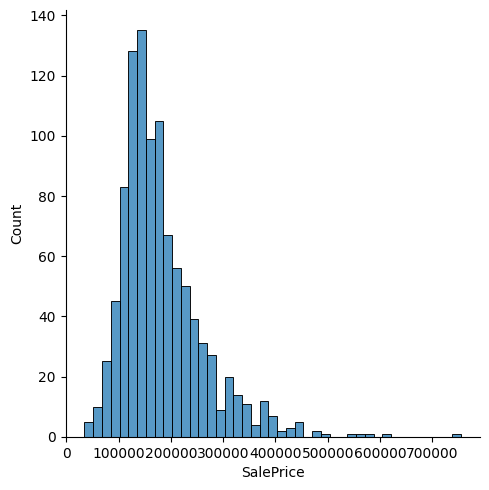

In [12]:
# Answer
sns.displot(y_target)
plt.show()

7) Tracer les histogrammes de toutes les autres variables en utilisant [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

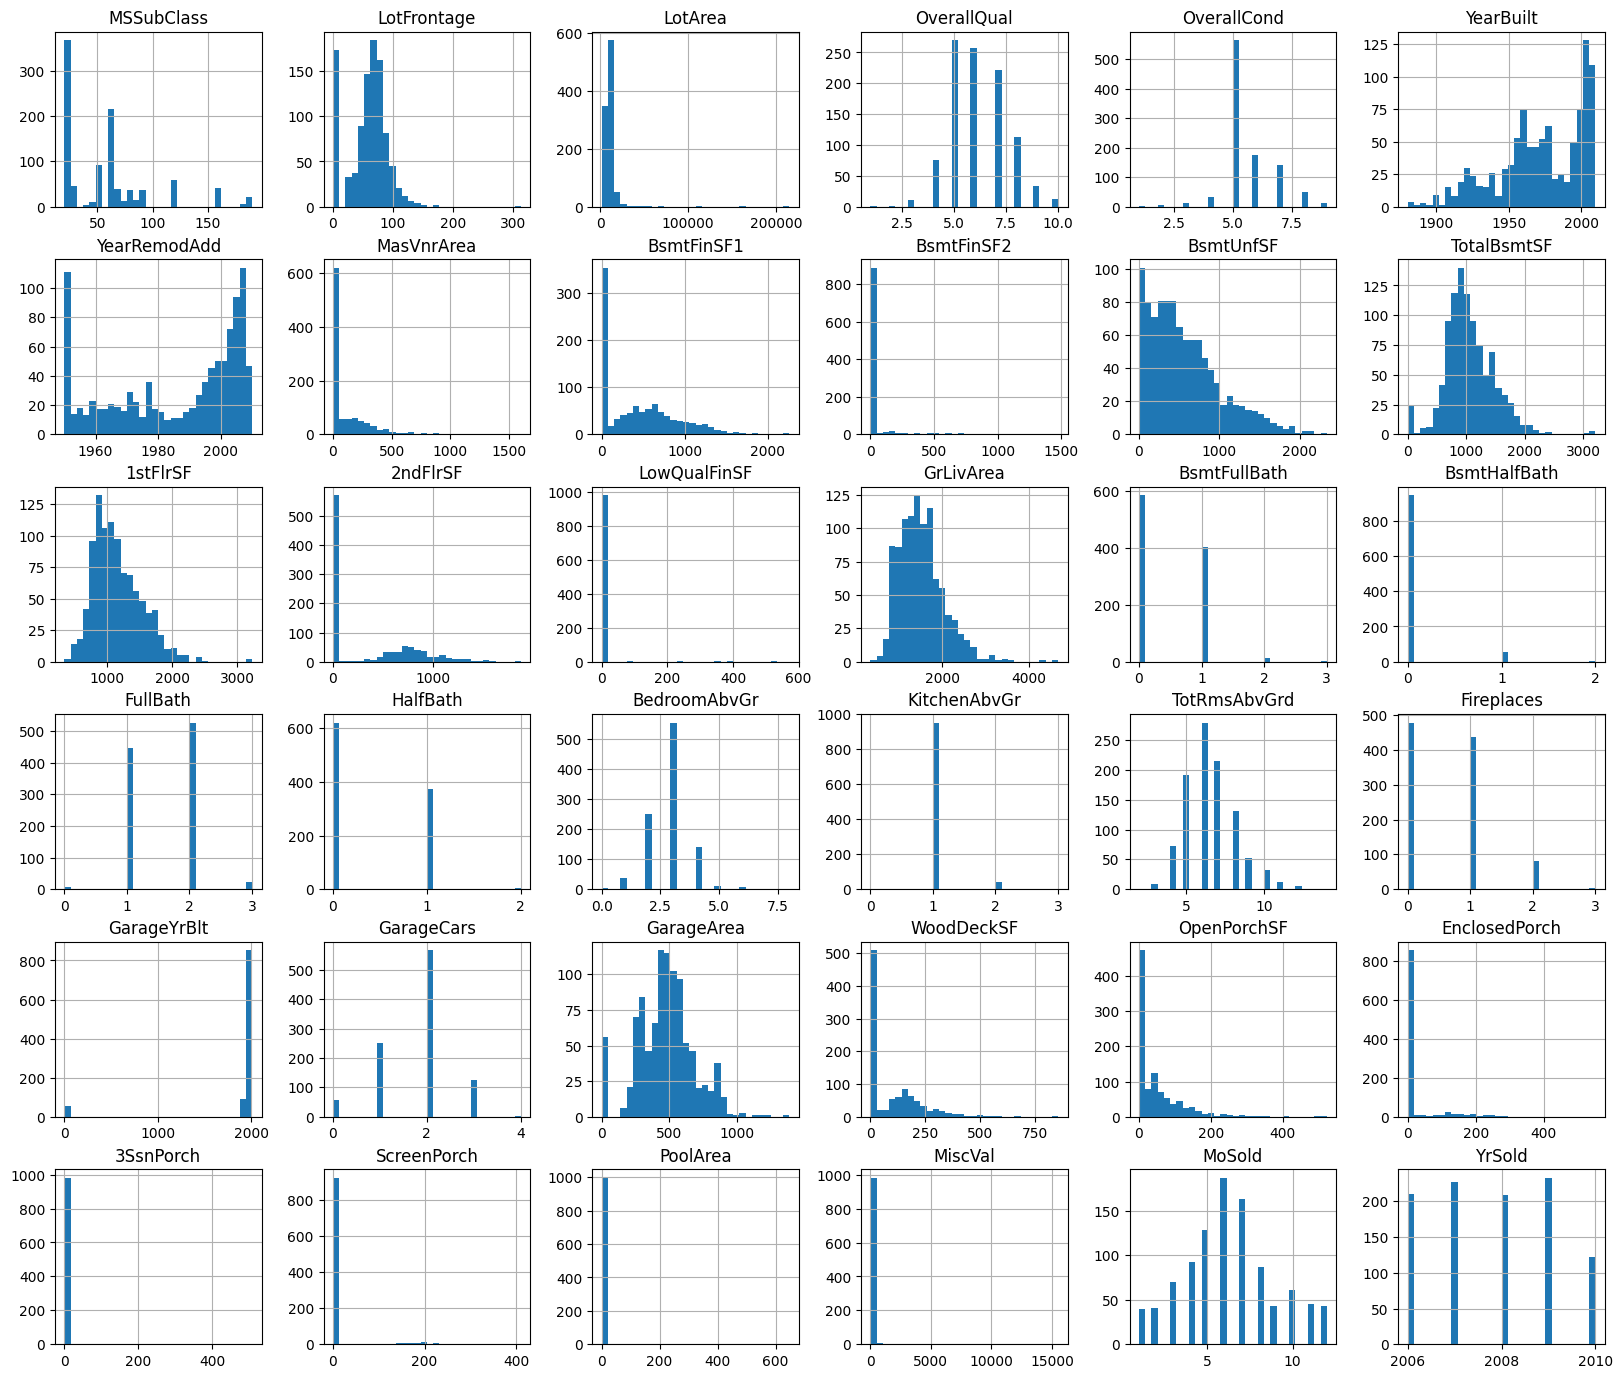

In [13]:
# Answer
house_data.hist(figsize=(20,20) ,bins=30 ,layout=(7,6))
plt.show()

8) Calculer et tracer la matrice de corrélation entre les variables à l’aide de [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Commenter les résultats.

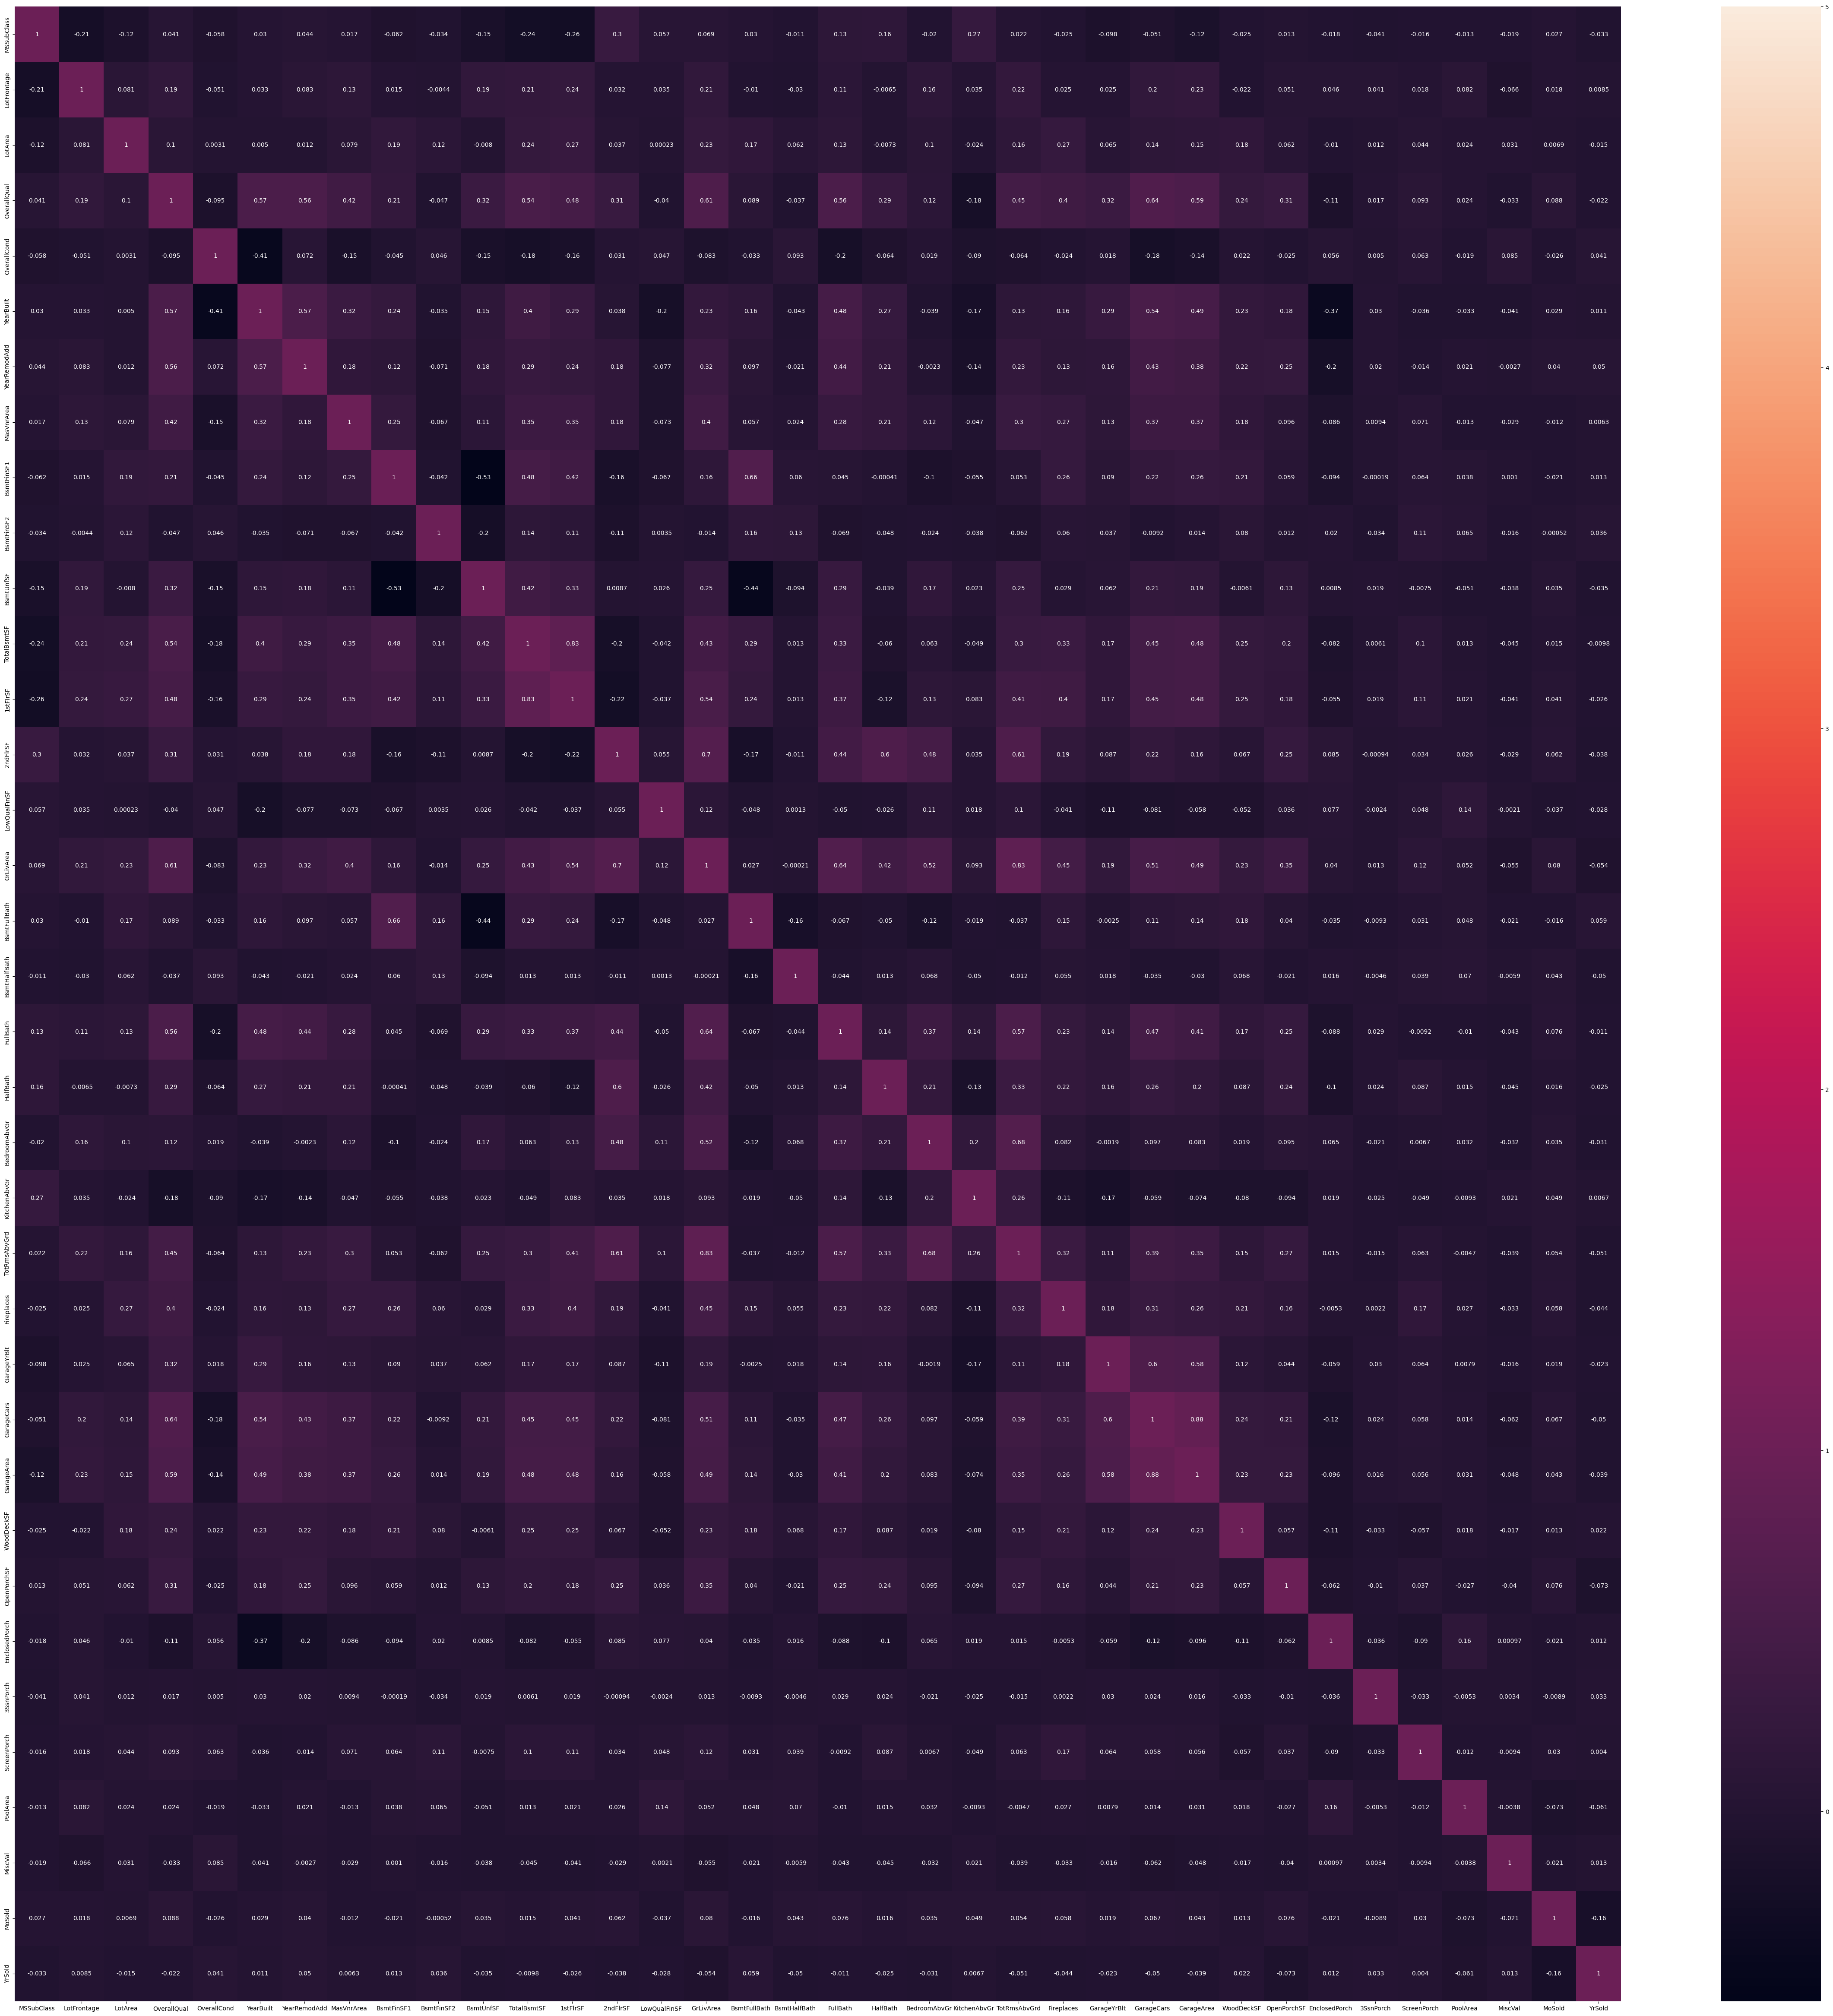

In [14]:
# Answer
plt.figure(figsize=(60, 60))
sns.heatmap(house_data.corr(),vmax=5.0,annot=True)
plt.show()

9) Visualiser les corrélations entre ```SalePrice``` et les autres variables en utilisant un [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html).

In [15]:
# Answer


10) Visualiser le nuage de points de la variable ```SalePrice``` en fonction de ```GrLivArea```. Commenter.

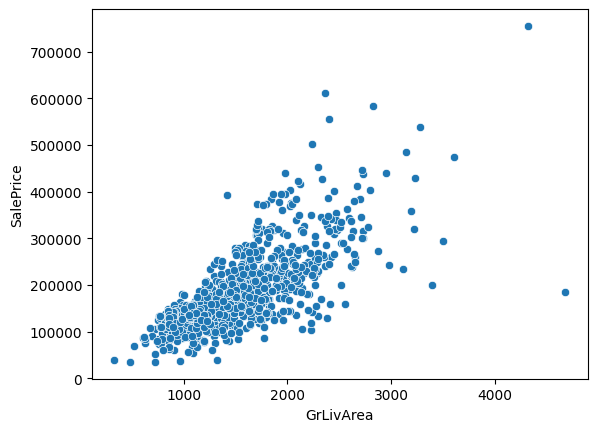

In [16]:
# Answer
sns.scatterplot(data=house_data,x="GrLivArea",y=y_target)
plt.show()

In [17]:
# interpretation :les observations sont concentrer sous le salePrice de 400000 et de GrLivArea de 3000 et les deux variable sont     cerrélé
# i.e ,à chaque fois que GrLivArea augmente SalePrice aussi augmente

11) Visualiser le boxplot de la variable ```SalePrice``` en fonction de ```OverallQual``` en utilisant [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Interpréter le boxplot.

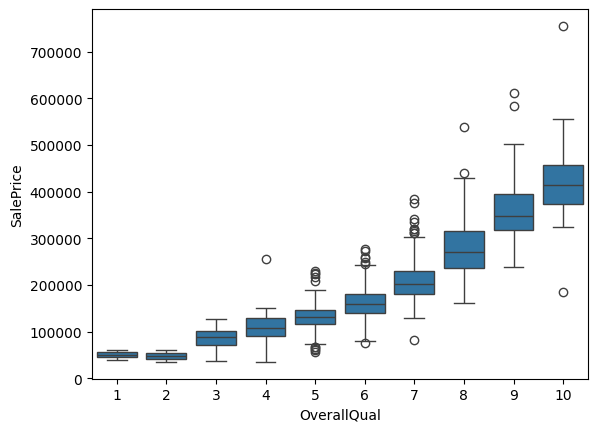

In [18]:
# Answer
sns.boxplot(x=house_data['OverallQual'] ,y=y_target)
plt.show()

In [19]:
# interpretation du box plot:Le prix de maison depends de la qualité du materiels,
# mais parfois il y a des des maison qui n'est pas en bonne qualité mais vendu en bonne prix(les valeurs aberentes)

12) Visualiser les distributions empiriques des jeux de données d’entraînement et de test (pour certaines variables). Commenter les résultats.

In [20]:
house_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

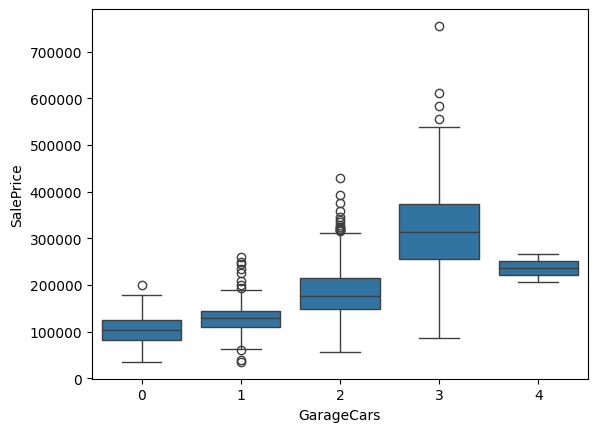

In [21]:
# Answer
sns.boxplot(x=house_data['GarageCars'] ,y=y_target)
plt.show()

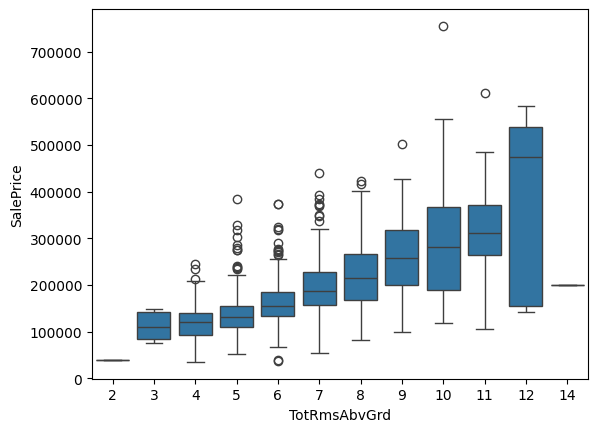

In [22]:
sns.boxplot(x=house_data['TotRmsAbvGrd'] ,y=y_target) 
plt.show()

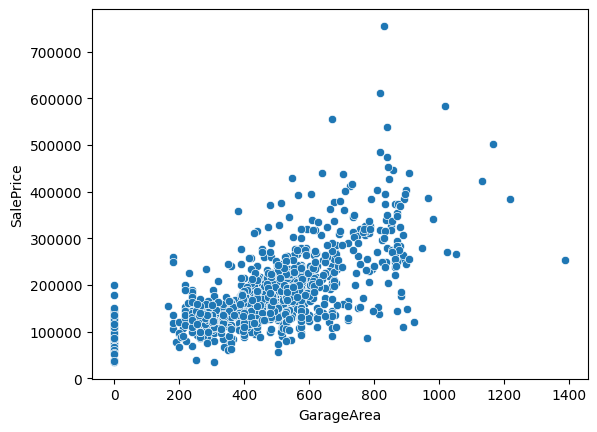

In [23]:


sns.scatterplot(data=house_data,x="GarageArea",y=y_target)
plt.show()

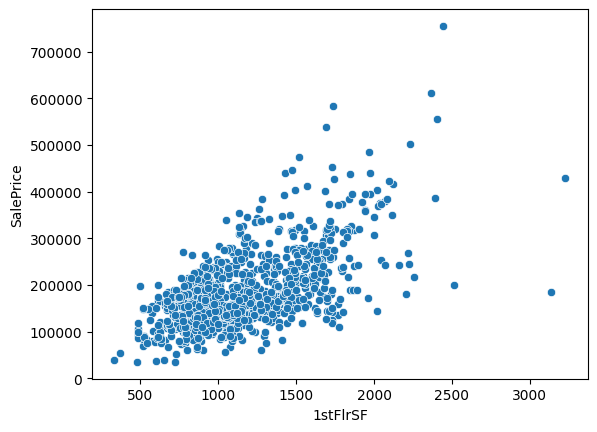

In [24]:
sns.scatterplot(data=house_data,x="1stFlrSF",y=y_target)
plt.show()

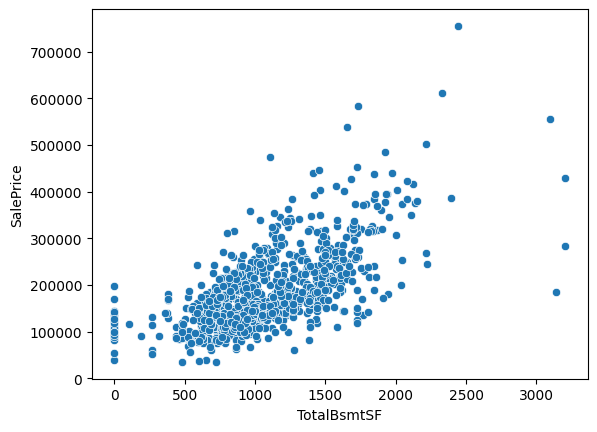

In [25]:

sns.scatterplot(data=house_data,x="TotalBsmtSF",y=y_target)
plt.show()

### Part 2: Entrainnement et evaluation du modeles

13) Divisez les données en un ensemble d'entraînement et un ensemble de validation à l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [26]:
x_train,x_test,y_train,y_test = train_test_split(house_data,y_target,test_size=0.3)


14) Entraînez un modèle de [régression linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (nous choisissons la régression linéaire pour apprendre à prédire la variable cible) et évaluez ses performances en utilisant la [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (RMSE = Root Mean Square Error, ou racine de l’erreur quadratique moyenne) et le [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html) (MAPE = Mean Absolute Percentage Error, ou erreur absolue moyenne en pourcentage) comme métriques. Évaluez ses performances sur les données de test. Commentez les résultats.

**Rappel :**

$$RMSE(Y,\hat{Y}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y_i})^2}\quad\quad\quad MAPE(Y,\hat{Y}) = \frac{1}{n} \sum_{i=1}^n \frac{|Y_i - \hat{Y_i}|}{Y_i}$$

où $Y$ est la vraie valeur de la cible, et $\hat{Y}$ est la valeur prédite.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
linearRegression = LinearRegression()
linearRegression.fit(x_train,y_train)

LinearRegression()

In [28]:
linearRegression.score(x_test,y_test)

0.7907118185395522

In [29]:
y_pred = linearRegression.predict(x_test)

In [30]:
root_mean_squared_error(y_test,y_pred)

39661.28858094891


**Objectif : Améliorer les prédictions !**

15) Entraînez les modèles suivants et évaluez leurs performances sur les ensembles de validation et de test :
- [Régression par plus proches voisins (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [Forêt aléatoire (Random Forest Regressor)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [31]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [32]:
model.score(x_test,y_test)

0.594861780914343

In [33]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge(0.2)
ridgeModel.fit(x_train,y_train)

Ridge(alpha=0.2)

In [34]:
ridgeModel.score(x_test,y_test)

0.790784974196487

16) Définissez une fonction qui prend en paramètre un dictionnaire de modèles et retourne la moyenne et l’écart-type du MAPE à l’aide d’une [validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) en trois plis. Vous pouvez considérer les modèles suivants :

- [Régression par vecteurs de support (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [Régression par gradient boosting extrême (XGBRegressor)](https://xgboost.readthedocs.io/en/stable/parameter.html)
- [Arbre de décision régressif (DecisionTreeRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [Régression par plus proches voisins (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [Régression linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
- [Forêt aléatoire (Random Forest Regressor)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## SVR

In [35]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import  GradientBoostingRegressor

In [36]:
grid_params = {
    'learning_rate' : [0.001,0.2,0.01 ,0.1],
    'n_estimators':[25,50,75,100],
    'criterion':['friedman_mse','squared_error']
}

estimator = GradientBoostingRegressor(random_state=42)
model = GridSearchCV(estimator=estimator ,param_grid=  grid_params ,cv=3)
model.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.2, 0.01, 0.1],
                         'n_estimators': [25, 50, 75, 100]})

In [37]:
model.score(x_test,y_test)

0.8244676101346499

In [38]:
model.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 100}

In [39]:
new_house = pd.read_csv('../dataset/House_pricing.csv')

In [40]:
representatif_variable = ['GarageCars','TotRmsAbvGrd',"GarageArea","1stFlrSF",'OverallQual','GrLivArea','SalePrice']

new_data = new_house[representatif_variable]
new_data.shape

(1000, 7)

In [41]:
corr = new_data.corr()

<Axes: >

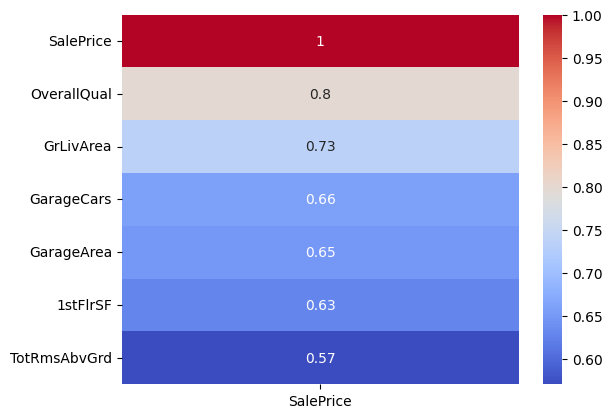

In [42]:
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')

<Axes: >

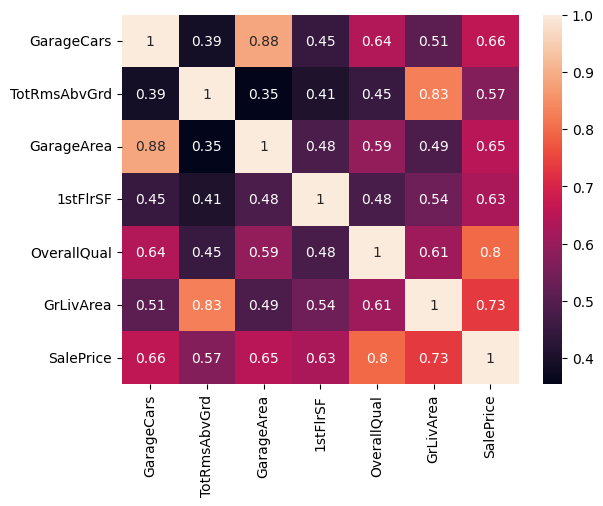

In [43]:
sns.heatmap(new_data.corr(),annot=True)

In [44]:
Y = new_data['SalePrice']

new_data.drop(['SalePrice'] ,axis=1,inplace=True)

In [45]:
new_x_train,new_x_test,new_y_train,new_y_test = train_test_split(new_data,Y,test_size=0.3)

In [46]:
mod = LinearRegression()
mod.fit(new_x_train,new_y_train)

LinearRegression()

In [47]:
mod.score(new_x_test,new_y_test)

0.7127633855580999

In [48]:
from sklearn.tree import  DecisionTreeRegressor

In [49]:
tree = DecisionTreeRegressor(random_state=42)

In [50]:
tree.fit(new_x_train,new_y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
tree.score(new_x_test,new_y_test)

0.632179009727651

In [52]:
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor(n_estimators=150, random_state=42)

In [53]:
model.fit(new_x_train,new_y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [54]:
model.score(new_x_test,new_y_test)

0.7420004804051985